# Business Programming Final Project

## Loading data
We begin by importing the Excel spreadsheet, as well as the libraries needed.  We'll call the loaded dataframe `tabla`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

tabla = pd.read_excel("Sample - Superstore archivo en Canvas.xls")

Let's take a look at the data

In [2]:
print(tabla)

            Order ID Customer ID     Customer Name    Segment  \
0     CA-2017-152156    CG-12520       Claire Gute   Consumer   
1     CA-2017-152156    CG-12520       Claire Gute   Consumer   
2     CA-2017-138688    DV-13045   Darrin Van Huff  Corporate   
3     US-2016-108966    SO-20335    Sean O'Donnell   Consumer   
4     US-2016-108966    SO-20335    Sean O'Donnell   Consumer   
...              ...         ...               ...        ...   
9989  CA-2015-110422    TB-21400  Tom Boeckenhauer   Consumer   
9990  CA-2018-121258    DB-13060       Dave Brooks   Consumer   
9991  CA-2018-121258    DB-13060       Dave Brooks   Consumer   
9992  CA-2018-121258    DB-13060       Dave Brooks   Consumer   
9993  CA-2018-119914    CC-12220      Chris Cortes   Consumer   

                 City  Postal Code Region       Product ID         Category  \
0           Henderson      42420.0  South  FUR-BO-10001798        Furniture   
1           Henderson      42420.0  South  FUR-CH-10000454   

We can see that there are 15 variables (columns) and 9,994 rows.
Let's focus on dividing the dataset into regions.  We create a 
variable called `regions` that contains the string values of the
different regions in the dataset.

In [3]:
regions = tabla.Region.unique()

In [4]:
print(regions)

['South' 'West' 'Central' 'East']


We see that there are four regions: South, West, Central and East.  Let's create one table per region and store each in a different variable so that we can perform further analysis on each region.

In [5]:
tablaSouth = tabla.groupby('Region').get_group('South')
tablaWest = tabla.groupby('Region').get_group('West')
tablaCentral = tabla.groupby('Region').get_group('Central')
tablaEast = tabla.groupby('Region').get_group('East')

Once we have one table per region, we can perform analysis on different variables.  Let's begin by calculating the total sales for each region, and store the value of them all in a list: `regionSales`

In [8]:
southSales = tablaSouth['Sales'].sum()
westSales = tablaWest['Sales'].sum()
centralSales = tablaCentral['Sales'].sum()
eastSales = tablaEast['Sales'].sum()
regionSales = [southSales, westSales, centralSales, eastSales]
print(regionSales)

[391721.905, 725457.8245, 501239.89080000005, 678781.24]


Now we can plot the results to better compare the sales in each region:

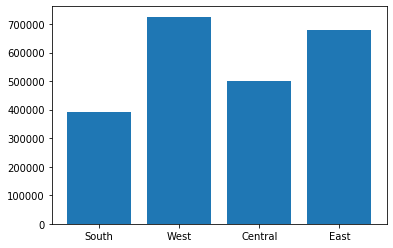

In [11]:
plt.bar(regions, regionSales)
plt.show()

We see that the West region is the one with the greatest sales.  But is it the most profitable as well?  Let's find the total profit per region and plot the results to find out.

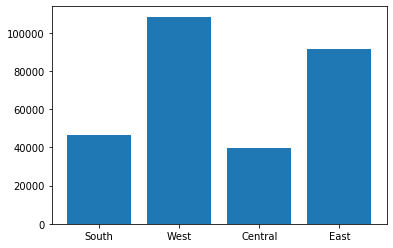

In [14]:
southProfit = tablaSouth['Profit'].sum()
westProfit = tablaWest['Profit'].sum()
centralProfit = tablaCentral['Profit'].sum()
eastProfit = tablaEast['Profit'].sum()
regionProfit = [southProfit, westProfit, centralProfit, eastProfit]
plt.bar(regions, regionProfit)
plt.show()

The West region is indeed the most profitable.  Curiously enough, we've found out that, even though the Central region has greater sales than the South region, it is not as profitable as the South.  Now let's find out about the quantity of products sold.

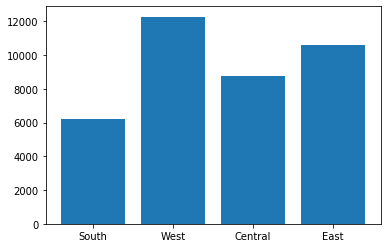

In [15]:
southQuantity = tablaSouth['Quantity'].sum()
westQuantity = tablaWest['Quantity'].sum()
centralQuantity = tablaCentral['Quantity'].sum()
eastQuantity = tablaEast['Quantity'].sum()
regionQuantity = [southQuantity, westQuantity, centralQuantity, eastQuantity]
plt.bar(regions, regionQuantity)
plt.show()

Again we see that the West region is the one that sold the most amount of products.  Now let's find out if there is any impact on the Discounts and Sales.

In [16]:
tabla['salesWithoutDiscount'] = tabla.Sales / (1 - tabla.Discount)

In [18]:
tabla['discountUSD'] = tabla.salesWithoutDiscount - tabla.Sales
tablaSouth = tabla.groupby('Region').get_group('South')
tablaWest = tabla.groupby('Region').get_group('West')
tablaCentral = tabla.groupby('Region').get_group('Central')
tablaEast = tabla.groupby('Region').get_group('East')

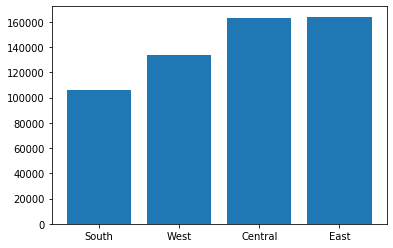

In [19]:
southDiscount = tablaSouth['discountUSD'].sum()
westDiscount = tablaWest['discountUSD'].sum()
centralDiscount = tablaCentral['discountUSD'].sum()
eastDiscount = tablaEast['discountUSD'].sum()
regionDiscount = [southDiscount, westDiscount, centralDiscount, eastDiscount]
plt.bar(regions, regionDiscount)
plt.show()

Again the West region doesn't give as much discount as the Central or the East regions, but it still manages to have more sales and be more profitable.